atividades do numero 7 ao numero 11
aluno : vilgledyson nobrega dos santos
professor : ricardo roberto 

In [1]:
import os
os.chdir("/content/sample_data")

In [2]:
!pip install tpot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 10.7 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=c81ffc09ebe1bfb0c20871df7d7c5acd8cfa84621c23d96c004045ac16f7894c
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [3]:
!pip install tpot
from tpot import TPOTClassifier
import shapely
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [6]:
df = pd.read_csv('/content/lending_club_dataset_v1.csv')

In [7]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [11]:
df.info

<bound method DataFrame.info of         loan_amnt  term  int_rate grade home_ownership  annual_inc  \
0         10000.0    36     11.44     B           RENT    117000.0   
1          8000.0    36     11.99     B       MORTGAGE     65000.0   
2         15600.0    36     10.49     B           RENT     43057.0   
3          7200.0    36      6.49     A           RENT     54000.0   
4         24375.0    60     17.27     C       MORTGAGE     55000.0   
...           ...   ...       ...   ...            ...         ...   
395214    10000.0    60     10.99     B           RENT     40000.0   
395215    21000.0    36     12.29     C       MORTGAGE    110000.0   
395216     5000.0    36      9.99     B           RENT     56500.0   
395217    21000.0    60     15.31     C       MORTGAGE     64000.0   
395218     2000.0    36     13.61     C           RENT     42996.0   

       verification_status  loan_status             purpose    dti  open_acc  \
0             Not Verified   Fully Paid            vacation  26.24      16.0   
1             Not Verified   Fully Paid  debt_consolidation  22.05      17.0   
2          Source Verified   Fully Paid         credit_card  12.79      13.0   
3             Not Verified   Fully Paid         credit_card   2.60       6.0   
4                 Verified  Charged Off         credit_card  33.95      13.0   
...                    ...          ...                 ...    ...       ...   
395214     Source Verified   Fully Paid  debt_consolidation  15.63       6.0   
395215     Source Verified   Fully Paid  debt_consolidation  21.45       6.0   
395216            Verified   Fully Paid  debt_consolidation  17.56      15.0   
395217            Verified   Fully Paid  debt_consolidation  15.88       9.0   
395218            Verified   Fully Paid  debt_consolidation   8.32       3.0   

        pub_rec  revol_bal  revol_util  total_acc initial_list_status  \
0           0.0    36369.0        41.8       25.0                   w   
1           0.0    20131.0        53.3       27.0                   f   
2           0.0    11987.0        92.2       26.0                   f   
3           0.0     5472.0        21.5       13.0                   f   
4           0.0    24584.0        69.8       43.0                   f   
...         ...        ...         ...        ...                 ...   
395214      0.0     1990.0        34.3       23.0                   w   
395215      0.0    43263.0        95.7        8.0                   f   
395216      0.0    32704.0        66.9       23.0                   f   
395217      0.0    15704.0        53.8       20.0                   f   
395218      0.0     4292.0        91.3       19.0                   f   

        mort_acc  pub_rec_bankruptcies  
0            0.0                   0.0  
1            3.0                   0.0  
2            0.0                   0.0  
3            0.0                   0.0  
4            1.0                   0.0  
...          ...                   ...  
395214       0.0                   0.0  
395215       1.0                   0.0  
395216       0.0                   0.0  
395217       5.0                   0.0  
395218       1.0                   0.0  

[395219 rows x 18 columns]>

In [ ]:
#observações faltantes
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': n. de obs. faltantes '{missing}' ==> '{portion:.3f}%'")

In [12]:
df.describe

<bound method NDFrame.describe of         loan_amnt  term  int_rate grade home_ownership  annual_inc  \
0         10000.0    36     11.44     B           RENT    117000.0   
1          8000.0    36     11.99     B       MORTGAGE     65000.0   
2         15600.0    36     10.49     B           RENT     43057.0   
3          7200.0    36      6.49     A           RENT     54000.0   
4         24375.0    60     17.27     C       MORTGAGE     55000.0   
...           ...   ...       ...   ...            ...         ...   
395214    10000.0    60     10.99     B           RENT     40000.0   
395215    21000.0    36     12.29     C       MORTGAGE    110000.0   
395216     5000.0    36      9.99     B           RENT     56500.0   
395217    21000.0    60     15.31     C       MORTGAGE     64000.0   
395218     2000.0    36     13.61     C           RENT     42996.0   

       verification_status  loan_status             purpose    dti  open_acc  \
0             Not Verified   Fully Paid            vacation  26.24      16.0   
1             Not Verified   Fully Paid  debt_consolidation  22.05      17.0   
2          Source Verified   Fully Paid         credit_card  12.79      13.0   
3             Not Verified   Fully Paid         credit_card   2.60       6.0   
4                 Verified  Charged Off         credit_card  33.95      13.0   
...                    ...          ...                 ...    ...       ...   
395214     Source Verified   Fully Paid  debt_consolidation  15.63       6.0   
395215     Source Verified   Fully Paid  debt_consolidation  21.45       6.0   
395216            Verified   Fully Paid  debt_consolidation  17.56      15.0   
395217            Verified   Fully Paid  debt_consolidation  15.88       9.0   
395218            Verified   Fully Paid  debt_consolidation   8.32       3.0   

        pub_rec  revol_bal  revol_util  total_acc initial_list_status  \
0           0.0    36369.0        41.8       25.0                   w   
1           0.0    20131.0        53.3       27.0                   f   
2           0.0    11987.0        92.2       26.0                   f   
3           0.0     5472.0        21.5       13.0                   f   
4           0.0    24584.0        69.8       43.0                   f   
...         ...        ...         ...        ...                 ...   
395214      0.0     1990.0        34.3       23.0                   w   
395215      0.0    43263.0        95.7        8.0                   f   
395216      0.0    32704.0        66.9       23.0                   f   
395217      0.0    15704.0        53.8       20.0                   f   
395218      0.0     4292.0        91.3       19.0                   f   

        mort_acc  pub_rec_bankruptcies  
0            0.0                   0.0  
1            3.0                   0.0  
2            0.0                   0.0  
3            0.0                   0.0  
4            1.0                   0.0  
...          ...                   ...  
395214       0.0                   0.0  
395215       1.0                   0.0  
395216       0.0                   0.0  
395217       5.0                   0.0  
395218       1.0                   0.0  

[395219 rows x 18 columns]>

In [13]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [14]:
df['loan_status'] = df.loan_status.map({'Fully Paid':0, 'Charged Off':1})

In [15]:
df['loan_status'].sum/len(df)

TypeError: unsupported operand type(s) for /: 'method' and 'int'

In [16]:
cat_var = [column for column in df.columns if df[column].dtype == object]
cat_var

['grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status']

In [17]:
df=pd.get_dummies(df, drop_first=True)

In [18]:
sample = df .sample(n=500, random_state=1)
x = sample.copy()
del x['loan_status']
y = sample['loan_status']

## Normalização dos dados

In [19]:
#cria dados normalizados
scaler = MinMaxScaler() #para estandardização: StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(x))
X_scaled.columns = x.columns
X_scaled

,loan_amnt,term,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,0.358824,0.0,0.385867,0.177204,0.497718,0.364031,0.000000,0.194370,0.858365,0.258253,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.475735,1.0,0.439829,0.153224,0.504310,0.606718,0.000000,0.070486,0.387833,0.447639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.300000,0.0,0.499786,0.113097,0.633874,0.242687,0.564406,0.004459,0.038023,0.447639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.235294,0.0,0.285653,0.101487,0.735548,0.242687,0.000000,0.212024,0.679658,0.137735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.0,0.440685,0.037321,0.662525,0.040448,0.000000,0.074777,0.776616,0.068868,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.288235,0.0,0.153319,0.341067,0.192698,0.202239,0.000000,0.224149,0.847909,0.241037,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.176471,0.0,0.357602,0.109261,0.124239,0.040448,0.000000,0.059520,0.941065,0.017217,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.323529,0.0,0.333619,0.161217,0.319726,0.283135,0.000000,0.261750,0.590304,0.258253,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.647059,1.0,0.131478,0.277120,0.158722,0.242687,0.000000,0.123550,0.133080,0.309904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#definição do cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

In [21]:
#definição do modelo
rfc = RandomForestClassifier()

In [22]:
%%time
#definição de hiperparâmetros
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8],
    'criterion' :['gini', 'entropy']
}

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 11.2 µs


In [23]:
%%time
#aplica grid search
GS_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = cv)
GS_rfc.fit(x, y)

CPU times: user 2min 41s, sys: 563 ms, total: 2min 42s
Wall time: 2min 44s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=1),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [24]:
#hiperparâmetros ótimos - grid search
GS_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

In [25]:
%%time
#aplica random search
RS_rfc = RandomizedSearchCV(rfc, param_grid, cv = cv, n_iter=15)
RS_rfc.fit(x, y)

CPU times: user 1min 12s, sys: 337 ms, total: 1min 13s
Wall time: 1min 13s


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=1),
                   estimator=RandomForestClassifier(), n_iter=15,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 6, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [200, 500]})

In [26]:
#aplica random search
RS_rfc = RandomizedSearchCV(rfc, param_grid, cv = cv, n_iter=15)
RS_rfc.fit(x, y)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=1),
                   estimator=RandomForestClassifier(), n_iter=15,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 6, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [200, 500]})

In [27]:
#hiperparâmetros ótimos - random search
RS_rfc.best_params_

{'n_estimators': 500,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'entropy'}

In [28]:
%%time
#aplica random search
RS_rfc = RandomizedSearchCV(rfc, param_grid, cv = cv, n_iter=15)
RS_rfc.fit(x, y)
%%time
#aplica random search
RS_rfc = RandomizedSearchCV(rfc, param_grid, cv = cv, n_iter=15)
RS_rfc.fit(x, y)

UsageError: Line magic function `%%time` not found.


In [29]:
#hiperparâmetros ótimos - random search
RS_rfc.best_params_

{'n_estimators': 200,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'entropy'}

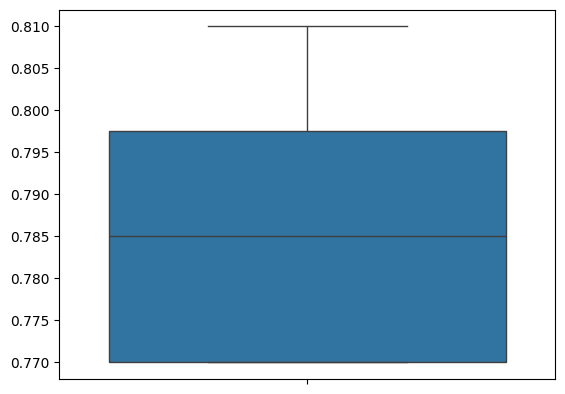

CPU times: user 331 ms, sys: 196 ms, total: 527 ms
Wall time: 7.43 s


In [30]:
%%time
#performance do modelo ótimo
best_rfc = RandomForestClassifier(n_estimators=200, max_features='log2', max_depth=8, criterion='entropy')
scores = cross_val_score(best_rfc, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
sns.boxplot(y=scores)
plt.show()

In [31]:
scores.mean()

0.7849999999999999

In [32]:
len(scores)

10

In [33]:
%%time
#GS - dados normalizados
GS_rfc_scaled = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = cv)
GS_rfc_scaled.fit(X_scaled, y)
GS_rfc_scaled.best_params_


CPU times: user 2min 49s, sys: 764 ms, total: 2min 50s
Wall time: 2min 52s


{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [34]:
%%time
#performance dados normalizados
best_rfc_scaled = RandomForestClassifier(n_estimators=200, max_features='sqrt', max_depth=8, criterion='gini')
scores = cross_val_score(best_rfc_scaled, X_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores.mean()

CPU times: user 59.8 ms, sys: 9.98 ms, total: 69.8 ms
Wall time: 3.13 s


0.786

In [35]:
%%time
#autoML - TPOT
tpot_clf = TPOTClassifier(generations=5,
                          population_size=50, # N. of individuals in the genetic programming population every generation
                          verbosity=2,        # How much information TPOT communicates while it's running (0-3).
                          scoring='accuracy',
                          cv=cv,
                          n_jobs=-1           # Use as many cores as available on the computer.
                        )
tpot_clf.fit(x, y)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.792

Generation 2 - Current best internal CV score: 0.792

Generation 3 - Current best internal CV score: 0.792

Generation 4 - Current best internal CV score: 0.792

Generation 5 - Current best internal CV score: 0.792

Best pipeline: RandomForestClassifier(SelectPercentile(input_matrix, percentile=37), bootstrap=True, criterion=gini, max_features=0.6500000000000001, min_samples_leaf=8, min_samples_split=12, n_estimators=100)
CPU times: user 30.4 s, sys: 1 s, total: 31.4 s
Wall time: 5min 47s


TPOTClassifier(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=1),
               generations=5, n_jobs=-1, population_size=50, scoring='accuracy',
               verbosity=2)

In [36]:
tpot_clf.fit(x, y)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.789

Generation 2 - Current best internal CV score: 0.789

Generation 3 - Current best internal CV score: 0.79

Generation 4 - Current best internal CV score: 0.79

Generation 5 - Current best internal CV score: 0.79

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.55, min_samples_leaf=5, min_samples_split=12, n_estimators=100)


TPOTClassifier(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=1),
               generations=5, n_jobs=-1, population_size=50, scoring='accuracy',
               verbosity=2)

In [37]:
tpot_clf.export('tpot_lending_club_model.py')

In [38]:
!pip install shap
import shap
shap.initjs()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 26.1 MB/s eta 0:00:00


In [39]:
Z = x.copy()
Z = Z.replace({True: 1, False: 0})
Z.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 308141 to 228137
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            500 non-null    float64
 1   term                                 500 non-null    int64  
 2   int_rate                             500 non-null    float64
 3   annual_inc                           500 non-null    float64
 4   dti                                  500 non-null    float64
 5   open_acc                             500 non-null    float64
 6   pub_rec                              500 non-null    float64
 7   revol_bal                            500 non-null    float64
 8   revol_util                           500 non-null    float64
 9   total_acc                            500 non-null    float64
 10  mort_acc                             500 non-null    float64
 11  pub_rec_bankruptcies         

In [40]:
#calcula valores de SHAP
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size = 0.2)
explainer = shap.Explainer(GS_rfc.predict, X_test)
shap_values = explainer(X_train)

PermutationExplainer explainer: 401it [06:15,  1.06it/s]


In [41]:
shap_values.shape

(400, 39)

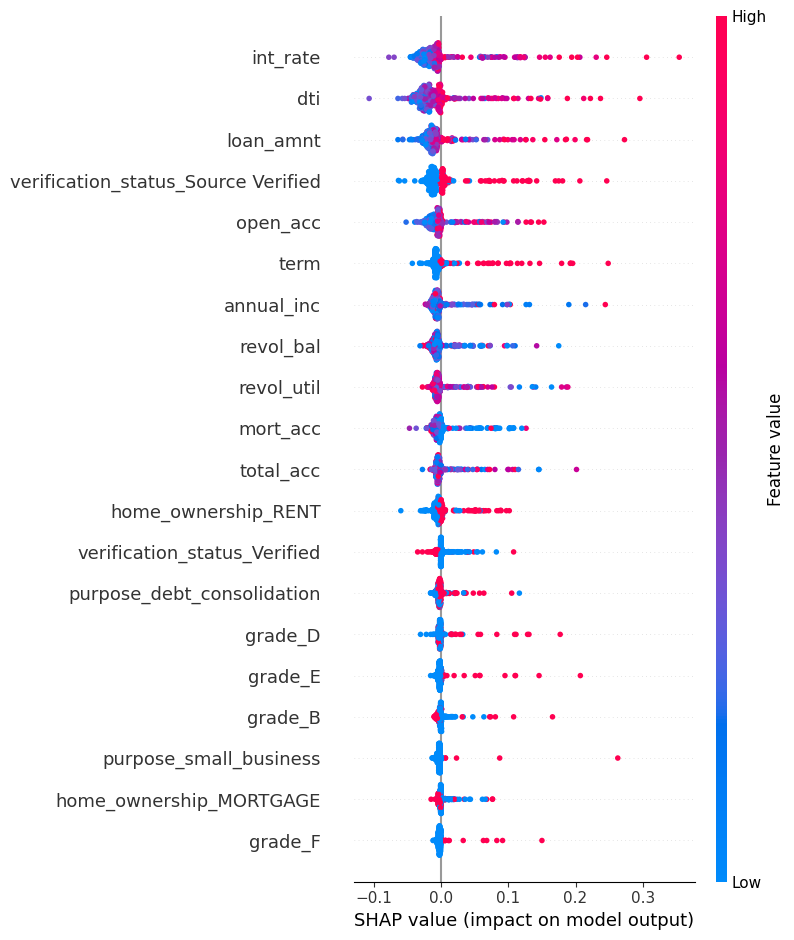

In [42]:
shap.summary_plot(shap_values, X_train)

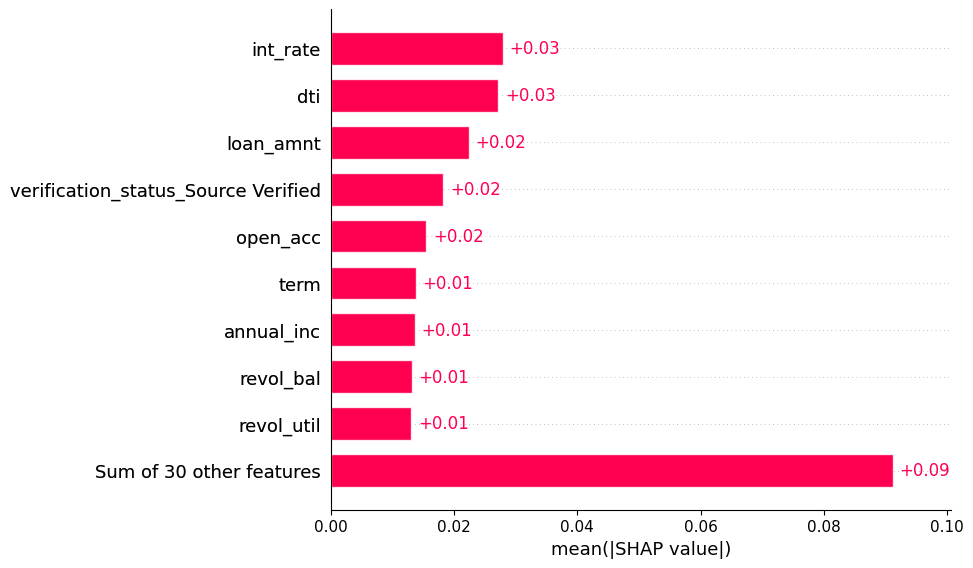

In [43]:
shap.plots.bar(shap_values)

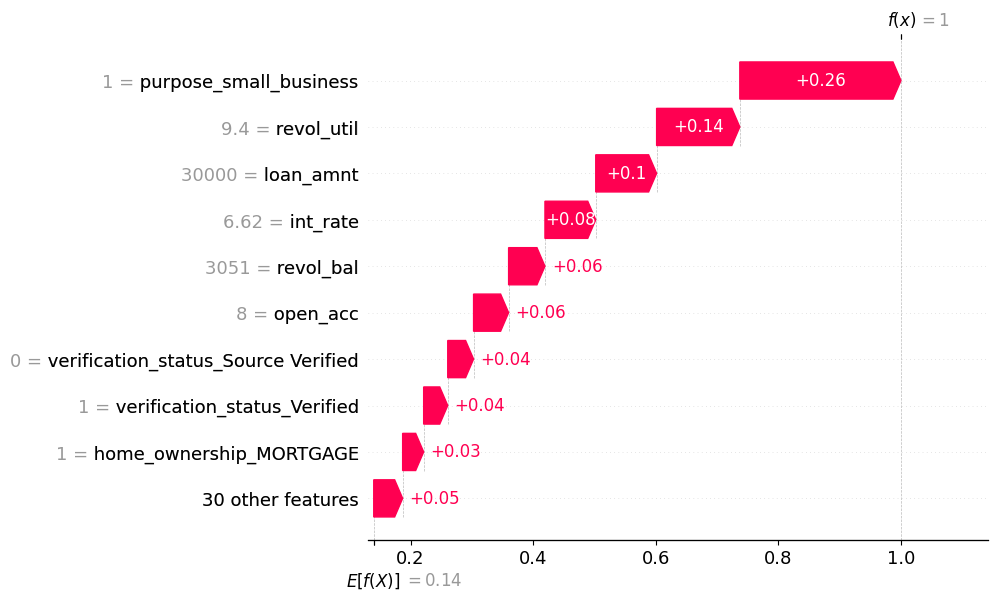

In [44]:
shap.plots.waterfall(shap_values[7])

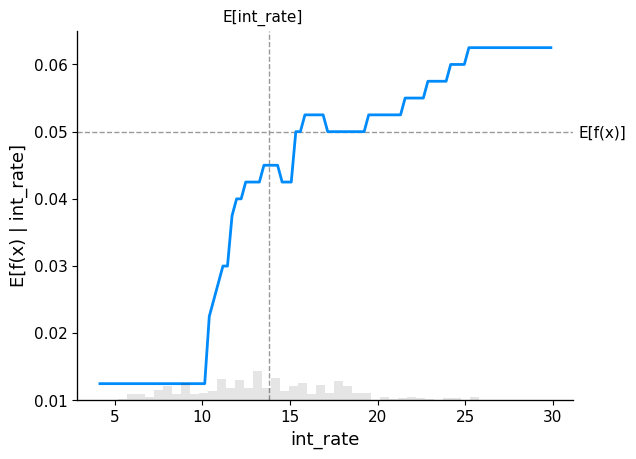

In [45]:
shap.plots.partial_dependence('int_rate', tpot_clf.predict, X_train, ice=False, model_expected_value=True,
                                      feature_expected_value=True)